# Introduction
Regression analysis is a supervised machine learning process for estimating the relationships among different features in data, then making further predictions on numerical data based on these relationships.<br>

Regression analysis is often used in finance and investing industry. For example, predicting house perice, stock market etc.

# Regression algorithms
Common regression algos:<br>
- Linear Regression<br>
- Decision Tree<br>
- Support Vector Regression<br>
- Lasso Regression<br>
- Random Forest<br>

Lets delve into each alogo:<br>

- ## Linear Regression
Linear regression performs the task to predict a dependent variable (target) based on the given independent variable(s). This regression technique aims at finding out a linear relationship between a dependent and independent varable(s)<br>

![Alt text](image-7.png)

![Alt text](image-9.png)

*Advantages of LR*<br>
- Linear regression is simple to implement.<br><br>

*Disdvantages of LR*<br>
- Greatly affected by outliers.
- Oversimplifies real-world problems by assuming a linear relationship among variables, hence not recommended for practical use cases

**Evaluation metrics from LR**<br>
- Coefficient of Determination (R^2)<br>
- Root Mean Squared Error (RMSE)

### Types  of Linear Regression
LR can be broadly classified into two tyes: <br>

1. **Simple Linear Regression** <br>
A simple straight-line equation involving slope and n intercept (an integer/continuous variable) is utilized in simple linear regression.

![Alt text](image.png)

2. **Multiple Linear Regression** <br>
When there is more than one independent variables.

![Alt text](image-1.png)

## Linear Regression Example: Car Prediction Model
Goal: Predict the car price by building a LR model. Dataset is available on Kaggle :https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho


In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset
url = 'https://raw.githubusercontent.com/5minslearn/Car-Price-Prediction-using-Linear-Regression/master/car%20data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# General data descrition
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


There are no null values

In [6]:
# Dropping categorical features
df.drop(columns =['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], inplace = True)

In [7]:
data = df.copy()

In [8]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


<Axes: >

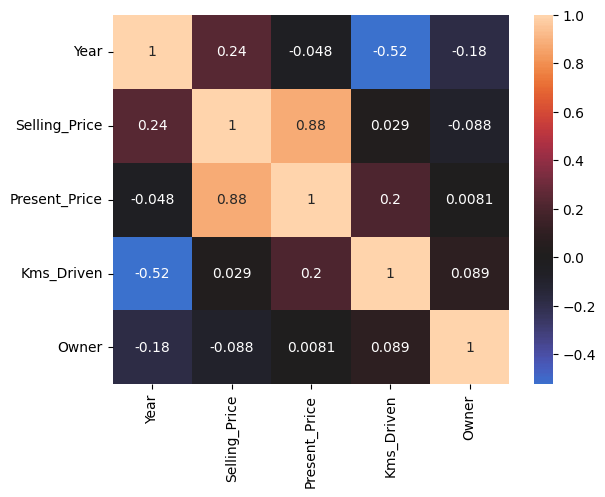

In [9]:
# Correlation Heatmap
sns.heatmap(data.corr(),center=0,annot=True)

### Building The Model
Determine the features and target columns. From our dataset, the selling price is the target.

In [10]:
#Target
y =data['Selling_Price']

# Features
X = data.drop(['Selling_Price'], axis =1)

In [11]:
#Shape of X and y
X.shape, y.shape

((301, 4), (301,))

#### Splitting the dataset

In [12]:
#Importing libraries
import sklearn
from sklearn.model_selection import train_test_split

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

#### Fit Model

In [13]:
#Importing libraries
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

#Fit model
LR.fit(X_train,y_train)

LinearRegression()

#### Prediction on test data

In [14]:
y_predicted =LR.predict(X_test)

#### Model Evaluation

In [15]:
#Using MSE

#Importing necessary libraries
from sklearn.metrics import mean_squared_error
MSE =mean_squared_error(y_test, y_predicted)

#Output
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 4.122560047937092


In [16]:
#Alternatively... Using a user defined function to combine several evaluation metrics..
from sklearn import metrics
def LR_eval(model,X_test,y_test,model_name):
    
    y_predicted = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_predicted)
    MSE = metrics.mean_squared_error(y_test,y_predicted)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test,y_predicted)
    
    return pd.DataFrame([MAE,MSE,RMSE,R2_Score],
                        index = ['MAE','MSE','RMSE','R2_Score'],
                        columns =[model_name])

LR_eval(LR,X_test,y_test,'Linear Regression')

,Linear Regression
MAE,1.393967
MSE,4.122560
RMSE,2.030409
R2_Score,0.821035


#### New predictions

In [17]:
new_data = pd.DataFrame({'Year': [2017] ,
                    'Present_Price':[8.5],
                    'Kms_Driven':[580],
                    'Owner':[0]})

new_pred = LR.predict(new_data)

print('\n Predictions on new data:')
print(new_pred)


 Predictions on new data:
[6.64562455]


#### Results Visualization

In [18]:
#cReating a dataframe with the actual and predicted values
y_predicted = LR.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test,
                              'Predicted':y_predicted}
                             )

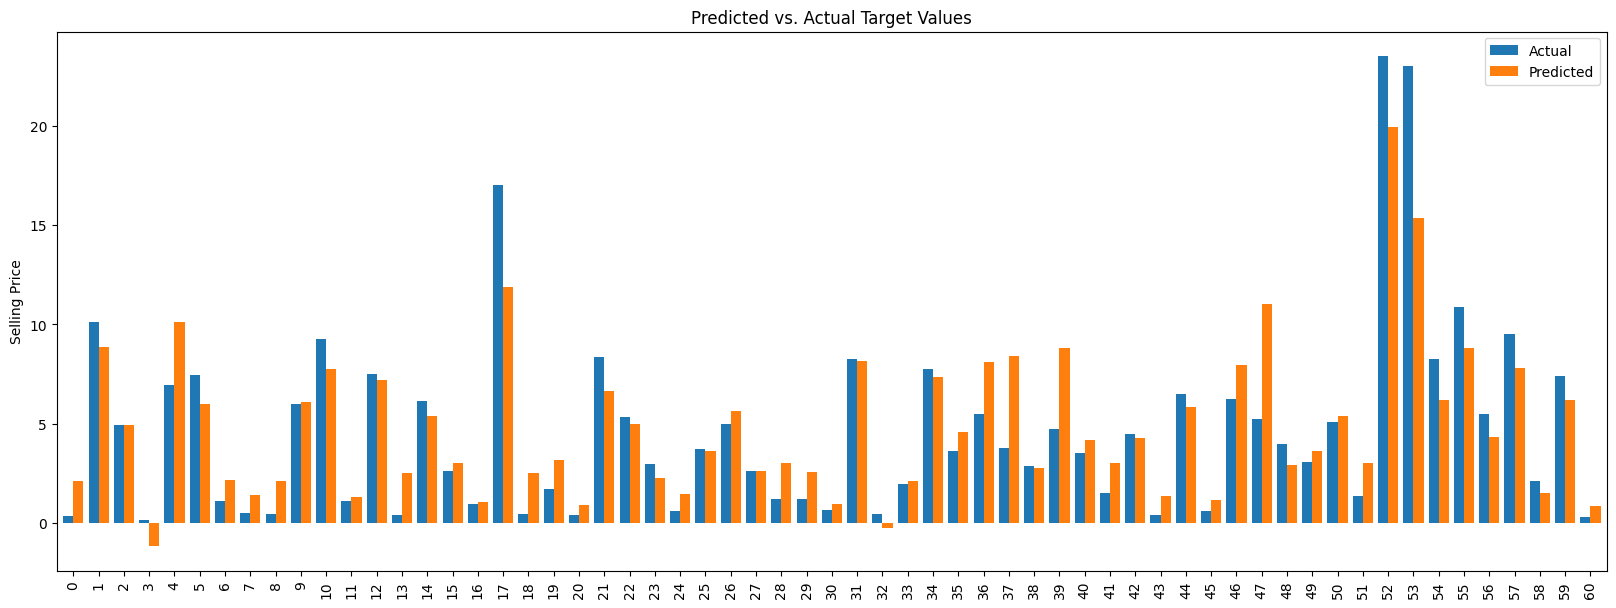

In [19]:
# Visualization by bar plot
def comparison(comparison_df):
    comparison_df.reset_index(inplace = True) #resets the index to default integrer index (0,1,2)
    comparison_df.plot(y =['Actual', 'Predicted'], kind = 'bar', figsize = (20,7), width =0.8)
    
    
    plt.title ('Predicted vs. Actual Target Values')
    plt.ylabel('Selling Price')
    plt.show()
comparison(comparison_df)

- ## Decision Tree Regressor
The decision tree models can be applied to all data that contains numerical and cetgorical features. They are good at capturing non-linear interactions between features and target variables. They classify or regress the data using true or false answers to certain questions. The resulting structure, when visualized, is in the form of a treee with different types of nodes-root, internal amd leaf.<br>

![Alt text](image-2.png)

Decision tree algorithms can be used for both classification and regression tasks in machine learning. When used for regression, the algorithm is often referred to as a Decision Tree Regression.<br>

*Pros:* <br>
- Easy to understand and interpret, visually intuitive. <br>
- It can work with numerical and categorical features. <br>
- Requires little data pre-processing. <br>

*Cons:*<br>
- Tends to overfit.<br>
- A small change in data tends to cause a big difference in the tree structure, which causes instability. <br>

## Decison Tree regression with scikit-learn

A 1D regression with decision tree

In [21]:
# importing necessary modules and libraries
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.tree import DecisionTreeRegressor

In [23]:
#Creating a random datset
rand_data = np.random.RandomState(1)
X = np.sort(5 * rand_data.rand(80,1), axis =0)
y = np.sin(X).ravel()
y[::5] += 3* (0.5 - rand_data.rand(16))

*Code explanation* <br>
- **np.random.RandomState(1)** creating a random state generator. The *Random State* class allows one to set a specific seed for reproducibility. In this case, the seed has been set to 1, meaning when one generates random numbers, you get the same sequence of random numbers everytime the code is run as long as the same reproducibility seed is used. <br>
- **X =np.sort(5 * rand_data.rand(80, 1), axis=0)** it generates an array of shape(80,1). The *rand_data.rand(80, 1)* generates random numbers in the range (0.0, 1.0) and then scales them by 5. The *np.sort* function sorts these numbers along the specified axis (axis=0 in this case), resulting in a sorted array.<br>
- **y =np.sin(X).ravel()** Here, you are applying the sine function (np.sin) to each element of the array X. The resulting array y contains the sine values corresponding to each element of X. The .ravel() method is used to flatten the array, converting it from a 2D array to a 1D array.<br>
- **y[::5] += 3 * (0.5 - rand_data.rand(16))** introduces some random noise to every 5th element of the array y. For every 5th element, it adds a random value between -1.5 and 1.5, creating a periodic noise in the sine wave.<br>

In summary, the code generates a synthetic dataset X containing sorted random values and a target variable y representing the sine of those values with added periodic noise.

In [24]:
# Fit the regression model
regr_1 = DecisionTreeRegressor(max_depth= 2)
regr_2 = DecisionTreeRegressor(max_depth= 5)

regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

max_depth controls the maximum depth of the decision tree. It limits the number of nodes in the tree, which helps prevent overfitting.

In [30]:
#Predicting
X_test = np.arange (0.0,5.0,0.1)[:,np.newaxis]
ypredict_1 =regr_1.predict(X_test)
ypredict_2 =regr_2.predict(X_test)

- **np.arange(0.0, 5.0, 0.1)** creates an array of values ranging from 0.0 to (but not including) 5.0, with a step size of 0.1.<br>
- **[:, np.newaxis]** This part adds a new axis to the array. The np.newaxis is used to increase the dimensionality of the array. In this case, it is converting a 1D array to a 2D column vector.<br>
In summary,the code generates a 1D array of values from 0.0 to 5.0 with a step size of 0.1 and then reshapes it into a 2D column vector. 

In [31]:
print(ypredict_1)

[ 0.05236068  0.05236068  0.05236068  0.05236068  0.05236068  0.05236068
  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568
  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568
  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568
  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568  0.71382568
  0.71382568  0.71382568 -0.45190264 -0.45190264 -0.45190264 -0.45190264
 -0.45190264 -0.45190264 -0.45190264 -0.86864256 -0.86864256 -0.86864256
 -0.86864256 -0.86864256 -0.86864256 -0.86864256 -0.86864256 -0.86864256
 -0.86864256 -0.86864256]


In [32]:
print(ypredict_2)

[-1.1493464   0.07894101  0.07894101  0.39845005  0.39845005  0.39845005
  0.80884013  0.80884013  0.80884013  0.80884013  0.80884013  0.80884013
  0.80884013  0.80884013 -0.20183403  1.02480053  1.02480053  1.02480053
  1.02480053  0.91498713  0.91498713  0.5424728   0.5424728   0.5424728
  0.5424728   0.5424728   0.5424728   0.5424728   0.5424728   0.5424728
  1.34959235  1.34959235 -0.17645185 -0.17645185 -0.24990778 -0.31896972
 -0.31896972 -0.54506608 -0.54506608 -0.82876593 -0.82876593 -0.82876593
 -0.82876593 -0.82876593 -0.97171398 -0.97171398 -0.20828128 -0.99848822
 -0.99848822 -0.9732277 ]


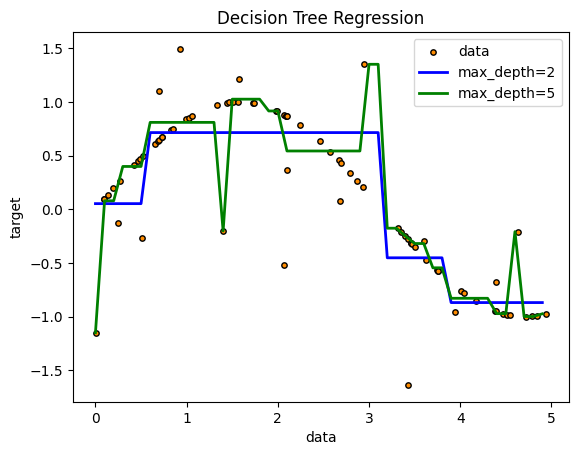

In [41]:
# Plotting the results
plt.figure()
plt.scatter(X, y, s=15, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, ypredict_1, color="blue", label="max_depth=2", linewidth=2)
plt.plot(X_test, ypredict_2, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Example 2: DecisionTree Regression

In [42]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data =np.array ([
    ['Asset Flip', 100, 1000], 
    ['Text Based', 500, 3000], 
    ['Visual Novel', 1500, 5000], 
    ['2D Pixel Art', 3500, 8000], 
    ['2D Vector Art', 5000, 6500], 
    ['Strategy', 6000, 7000],
    ['First Person Shooter', 8000, 15000],
    ['Simulator', 9500, 20000],
    ['Racing', 12000, 21000],
    ['RPG', 14000, 25000],
    ['Sandbox', 15500, 27000],
    ['Open-World', 16500, 30000],
    ['MMOFPS', 25000, 52000],
    ['MMORPG', 30000, 80000]
    ] )

In [64]:
#Setting the Features

X =  data [:, 1:2].astype(int) # Select all the rows and column 1
X

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [60]:
# Target column
y = data[:,2].astype(int)
y

array([ 1000,  3000,  5000,  8000,  6500,  7000, 15000, 20000, 21000,
       25000, 27000, 30000, 52000, 80000])

In [67]:
# import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

#Create a regressor object
DT = DecisionTreeRegressor(random_state= 0)

#Fit model
DT.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [76]:
#Predicting new value
y_pred = DT.predict([[4000]])
print('Predicted ouptput:',y_pred)

Predicted ouptput: [8000.]


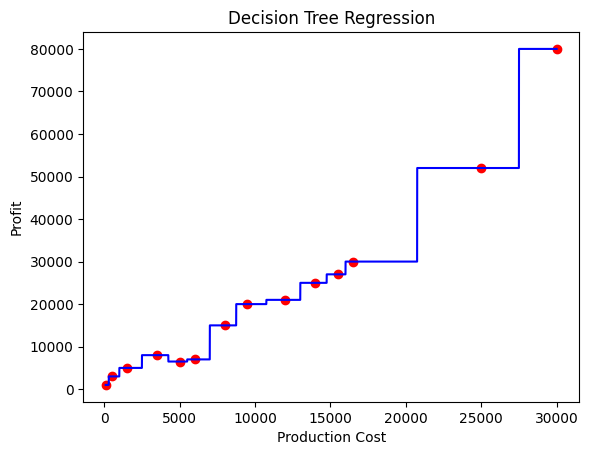

In [81]:
# Visualizing the results
X_grid = np.arange(min(X), max(X), 0.01)  #create a range of values from min to max of X
X_grid = X_grid.reshape((len(X_grid), 1)) #reshaping the data
plt.scatter(X, y, color = 'red') 
plt.plot(X_grid, DT.predict(X_grid), color = 'blue')
plt.xlabel("Production Cost")
plt.ylabel("Profit")
plt.title("Decision Tree Regression")
plt.show()

In [82]:
# Tree structure of the same
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(DT, out_file ='tree.dot', 
               feature_names =['Production Cost'])